# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
# Checking the number of mice.
mouseCount = len(mouse_data_complete["Mouse ID"].unique())
mouseCount

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseDupID = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
mouseDupID

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseDupAll = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989"]
mouseDupAll

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData = mouse_data_complete[mouse_data_complete["Mouse ID"].isin(mouseDupID)==False]
cleanData = cleanData.reset_index(drop=True)
cleanData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [173]:
# Checking the number of mice in the clean DataFrame.
newMouseCount = cleanData["Mouse ID"].value_counts()
newMouseCount

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [174]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


meanRegimen = round((cleanData.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()), 3)
medianRegimen = round((cleanData.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()), 3)
varRegimen = round((cleanData.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()), 3)
stdRegimen = round((cleanData.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()), 3)
semRegimen = round((cleanData.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()), 3)



# Assemble the resulting series into a single summary DataFrame.
mouseDrugSummary = {"Mean Tumor Volume (mm3)": meanRegimen, "Median Tumor Volume (mm3)": medianRegimen, 
                    "Variance": varRegimen, "Standard Deviation": stdRegimen, "SEM": semRegimen}
mouseDrugSummary = pd.DataFrame(mouseDrugSummary)
mouseDrugSummary


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mice_summary_stat = round((cleanData[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").describe()), 3)
mice_summary_stat

Tumor Volume (mm3)                                         \
                          count    mean    std     min     25%     50%   
Drug Regimen                                                             
Capomulin                 230.0  40.676  4.995  23.344  37.686  41.558   
Ceftamin                  178.0  52.591  6.268  45.000  47.208  51.776   
Infubinol                 178.0  52.885  6.567  36.321  47.312  51.821   
Ketapril                  188.0  55.236  8.280  45.000  48.233  53.699   
Naftisol                  186.0  54.332  8.135  45.000  47.286  52.509   
Placebo                   181.0  54.034  7.821  45.000  47.459  52.289   
Propriva                  148.0  52.321  6.622  45.000  46.894  50.446   
Ramicane                  228.0  40.217  4.846  22.050  36.675  40.673   
Stelasyn                  181.0  54.233  7.710  45.000  48.047  52.432   
Zoniferol                 182.0  53.237  6.967  45.000  47.338  51.818   

                              
                 75%     max  
Drug Regimen                  
Capomulin     45.000  48.158  
Ceftamin      56.801  68.923  
Infubinol     57.314  72.227  
Ketapril      60.871  78.567  
Naftisol      59.963  76.669  
Placebo       59.917  73.213  
Propriva      56.492  72.455  
Ramicane      45.000  47.623  
Stelasyn      58.719  75.124  
Zoniferol     57.954  73.324

## Bar and Pie Charts

Text(0.5, 1.0, 'Timepoints per Mouse Tested by Drug Regimen')

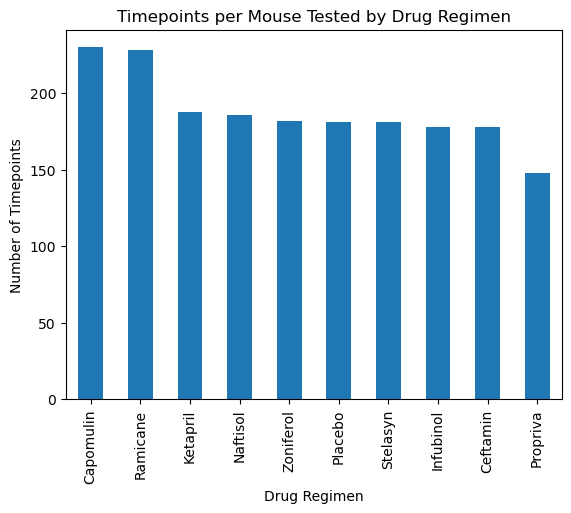

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

cleanDataBar = cleanData["Drug Regimen"].value_counts()
cleanDataBar.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Timepoints per Mouse Tested by Drug Regimen")

Text(0.5, 1.0, 'Timepoints per Mouse Tested by Drug Regimen')

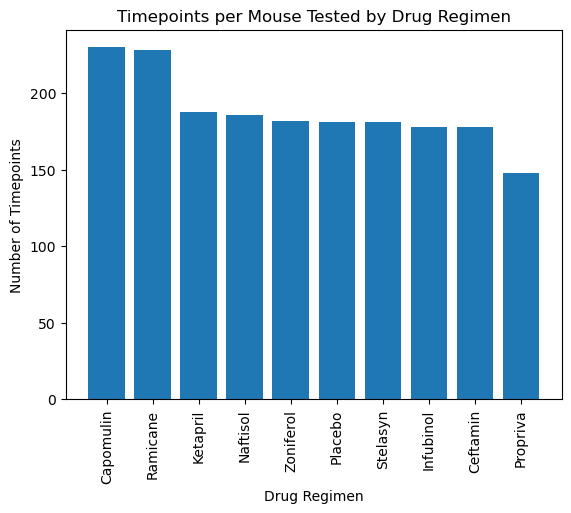

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
cleanDataPyBar = cleanData["Drug Regimen"].value_counts()
plt.bar(cleanDataPyBar.index.values, cleanDataPyBar.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Timepoints")
plt.title("Timepoints per Mouse Tested by Drug Regimen")


Male      958
Female    922
Name: Sex, dtype: int64

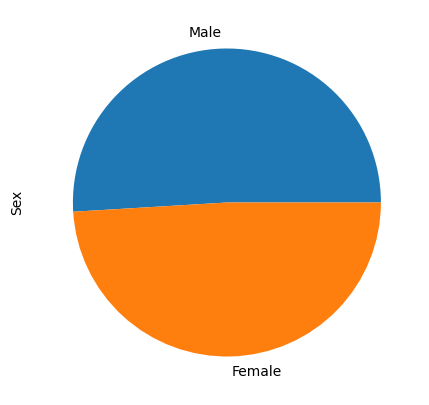

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleanDataPie = cleanData["Sex"].value_counts()
cleanDataPie.plot.pie(y="Sex", figsize=(5, 5))
#confirm pie plot looks accurate
sex = cleanData["Sex"].value_counts()
sex

Text(0.5, 1.0, 'Sex')

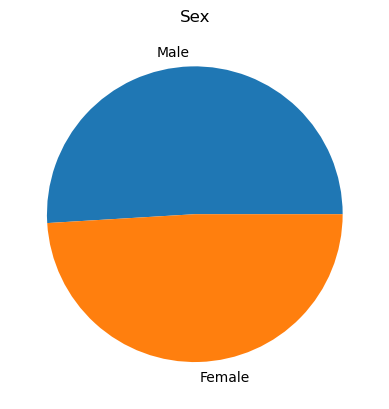

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
cleanDataPyPie = cleanData["Sex"].value_counts()
labels = cleanData["Sex"].unique()
fig, PyPie = plt.subplots()
PyPie.pie(cleanDataPyPie, labels=labels)
plt.title("Sex")


## Quartiles, Outliers and Boxplots

In [177]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatestTP = cleanData.groupby(["Mouse ID"])["Timepoint"].max()
greatestTP.reset_index()
#print(greatestTP)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouseCopy = pd.merge(greatestTP, cleanData, on=["Mouse ID", "Timepoint"], how="left")
mouseCopy

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [129]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volData = []
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
for drug in treatments:
    filtered_df = mouseCopy.loc[(mouseCopy["Drug Regimen"] == drug)]
    tumorVolumes = filtered_df["Tumor Volume (mm3)"]
    volData.append(tumorVolumes)
#print(volData)    
    q1, q3 = np.percentile(tumorVolumes, [25, 75])
    iqr = round((q3 - q1), 3)
    print(f"IQR for {drug} is: {iqr}")

    # Determine outliers using upper and lower bounds
    lower = round((q1 - (1.5 * iqr)), 3)
    upper = round((q3 + (1.5 * iqr)), 3)
    print(f"The lower bound for {drug} is {lower} and the upper bound is {upper}")

    if iqr >= lower and iqr <= upper:
        pass
    else:
        outliers.append(iqr)
       
        print(f"The outliers for {drug} are {outliers}")


IQR for Capomulin is: 7.782
The lower bound for Capomulin is 20.704 and the upper bound is 51.832
The outliers for Capomulin are [7.782]
IQR for Ramicane is: 9.099
The lower bound for Ramicane is 17.912 and the upper bound is 54.308
The outliers for Ramicane are [7.782, 9.099]
IQR for Infubinol is: 11.477
The lower bound for Infubinol is 36.833 and the upper bound is 82.741
The outliers for Infubinol are [7.782, 9.099, 11.477]
IQR for Ceftamin is: 15.578
The lower bound for Ceftamin is 25.355 and the upper bound is 87.667
The outliers for Ceftamin are [7.782, 9.099, 11.477, 15.578]


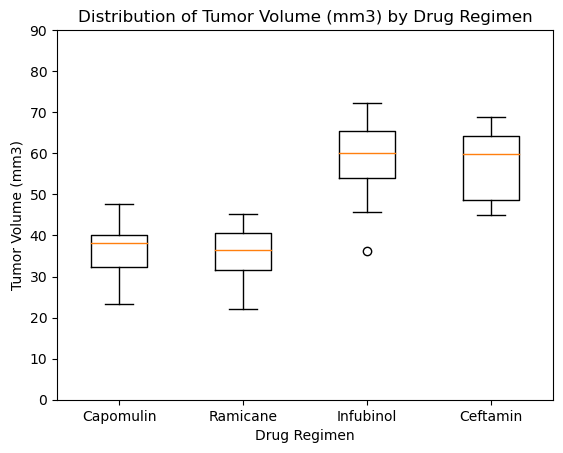

In [113]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(volData, labels=treatments, showfliers="dots")
plt.title("Distribution of Tumor Volume (mm3) by Drug Regimen")
plt.xlabel("Drug Regimen")

plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0, 90)
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs Time Point for a Mouse Treated with Capomulin')

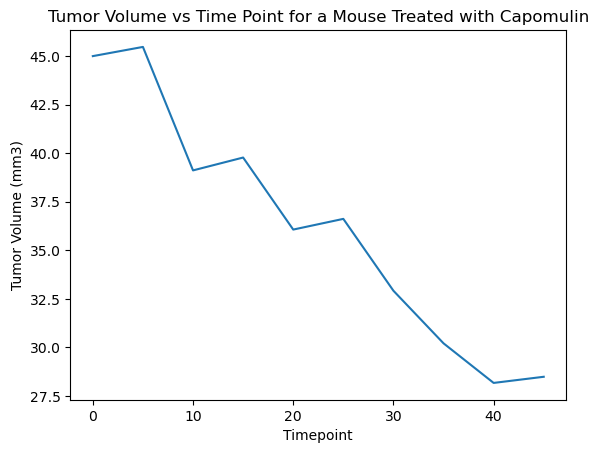

In [178]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = cleanData.loc[(cleanData["Drug Regimen"] == "Capomulin")]
#print(capomulin)
mouse = capomulin.loc[(capomulin["Mouse ID"] == "x401")]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])

plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title("Tumor Volume vs Time Point for a Mouse Treated with Capomulin")

Text(0, 0.5, 'Mouse Weight (g)')

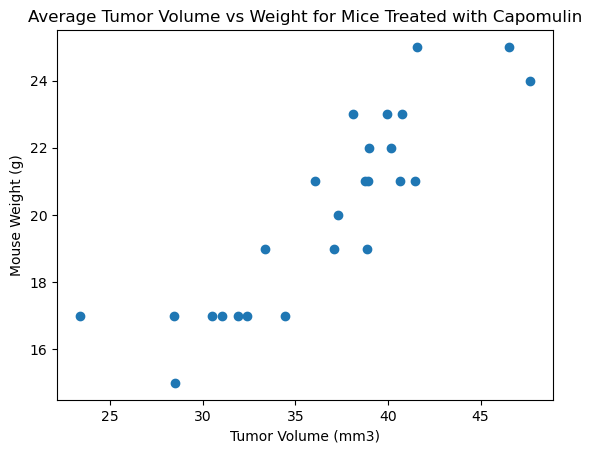

In [159]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avgTumorVol = round((capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()), 2)
#print(avgTumorVol)
weight = round((capomulin.groupby("Mouse ID")["Weight (g)"].mean()), 2)
#print(weight)

plt.scatter(avgTumorVol, weight)

plt.title("Average Tumor Volume vs Weight for Mice Treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")

## Correlation and Regression

Text(0, 0.5, 'Mouse Weight (g)')

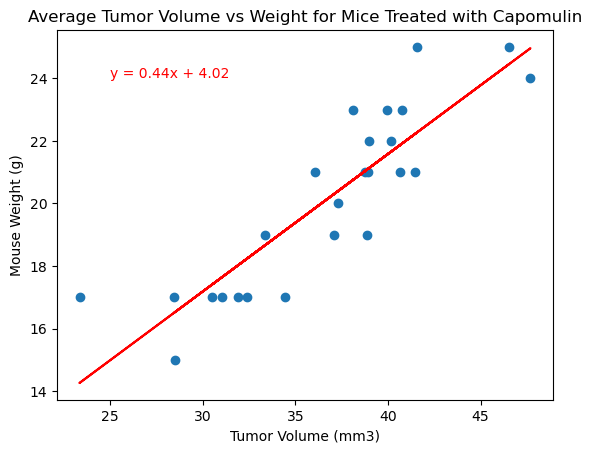

In [170]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(avgTumorVol, weight)
regress_values = avgTumorVol * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(avgTumorVol, weight)
plt.plot(avgTumorVol, regress_values, "r-")
plt.annotate(line_eq, (5.8,0.8), fontsize=15, color="red")

#add equation to plot
plt.text(25, 24, line_eq, color="red")

plt.title("Average Tumor Volume vs Weight for Mice Treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
